<a href="https://colab.research.google.com/github/DanMint/complex_net_proj/blob/main/Complex_net_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Complex networks project***

I chose the Dataset for the article "Relationship patterns in the 19th century: The friendship network in a German boys' school class from 1880 to 1881 revisited" by Heidler, Gamper, Herzd & Eßer. The graph on Gephi without anything done to it looks like this in Gephi.

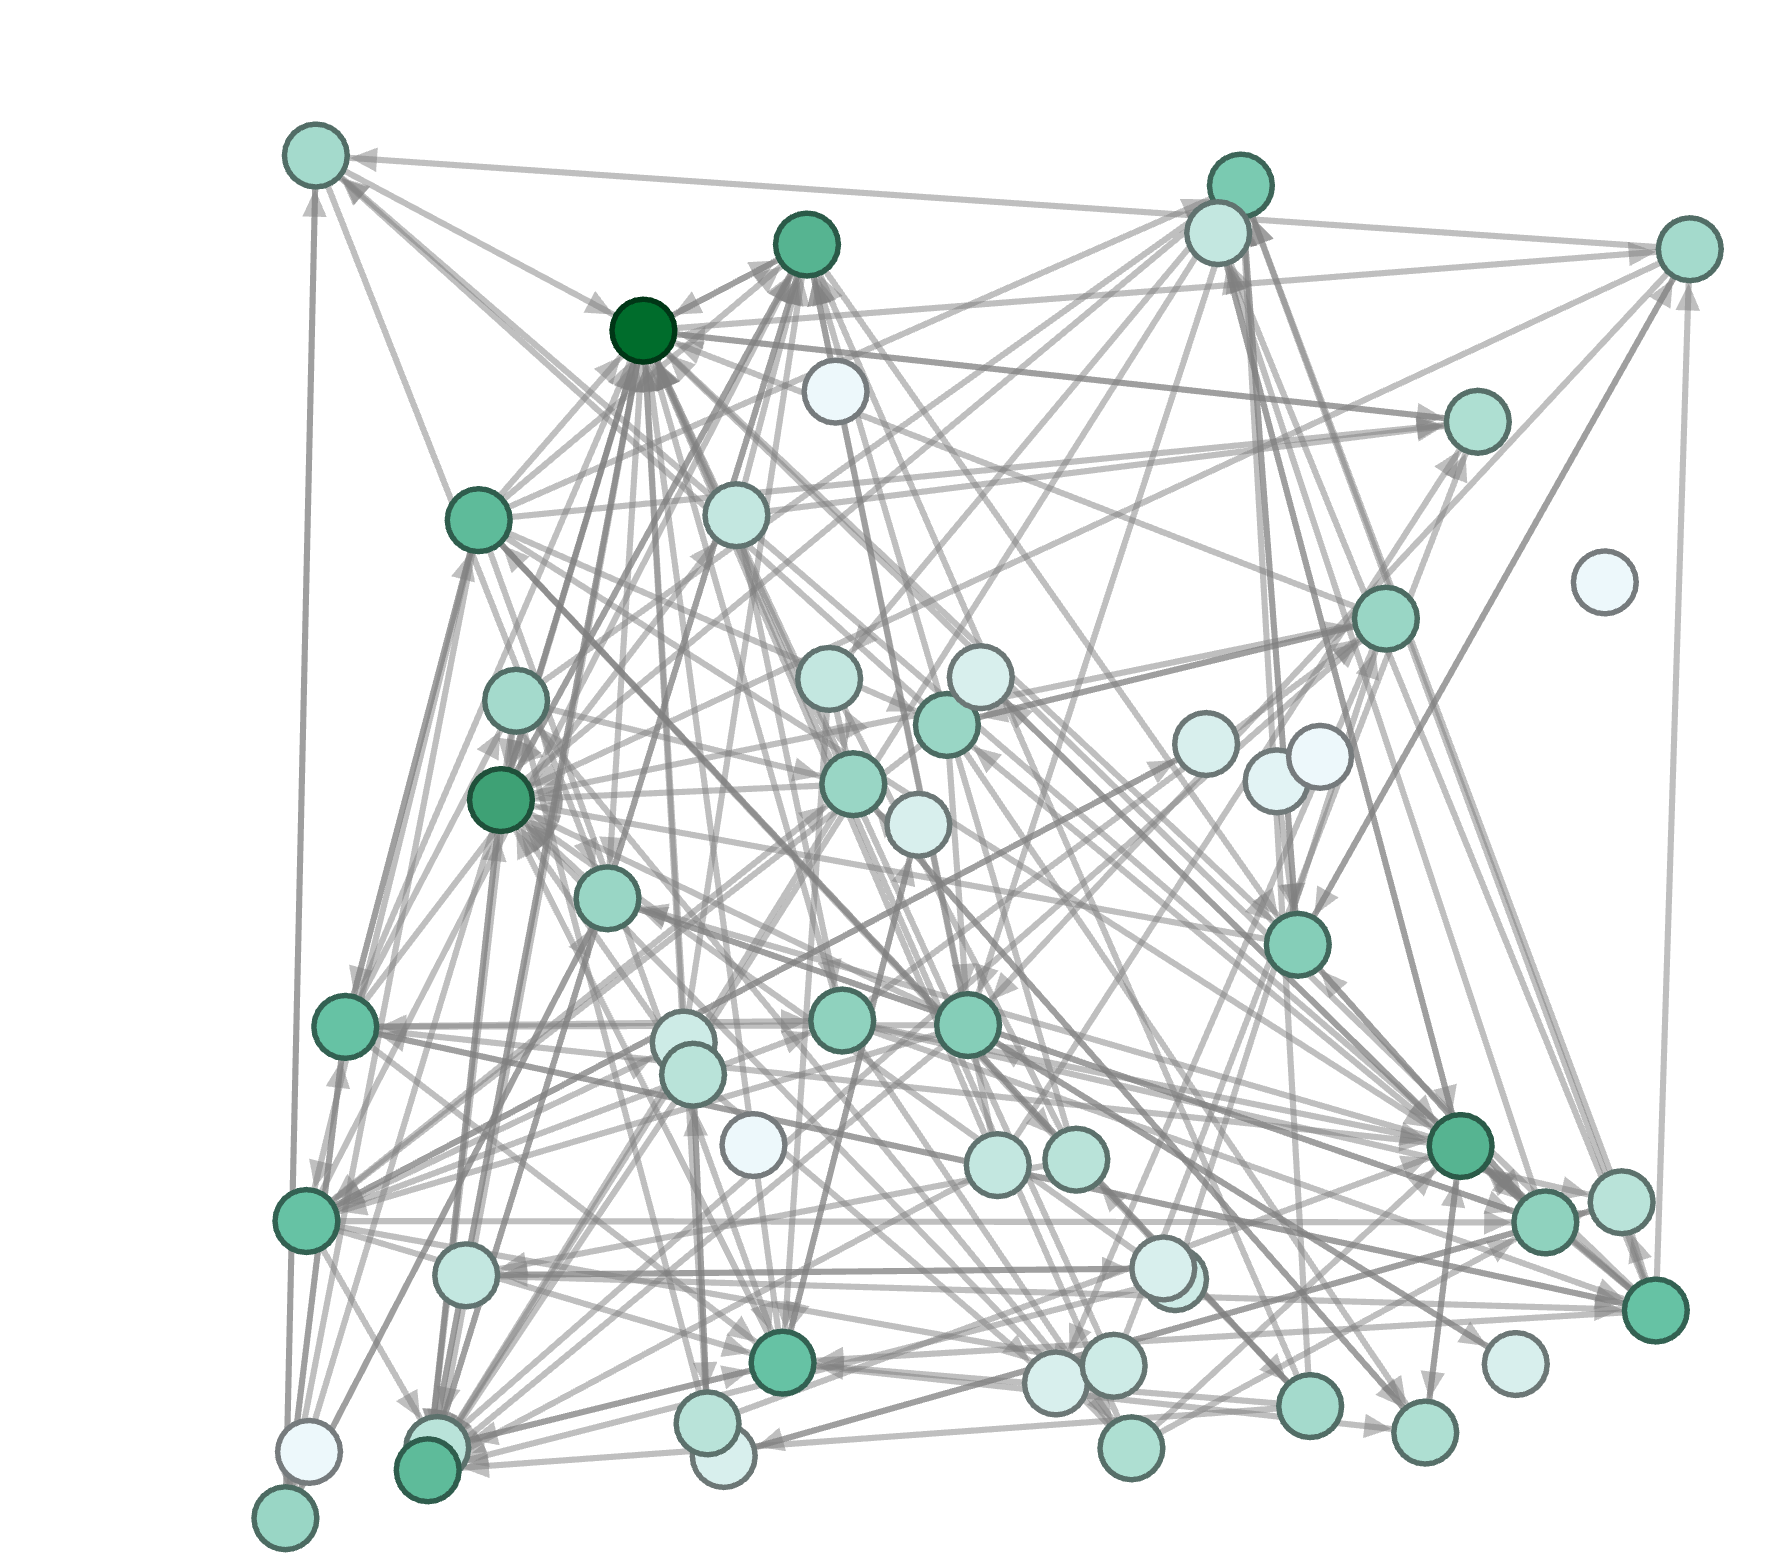

After applying force atlas on it and ranking the nodes by dgree we see the foloowing:

1.   The nodes that have no edges connecting them are white and are flying away from rhe rest because there is no force keeping them together
2.   The nodes that have 1 to alot of edges that connect them to other nodes are abit of a darker green color and they have attraction force thus they doent fly away when force atals is applied




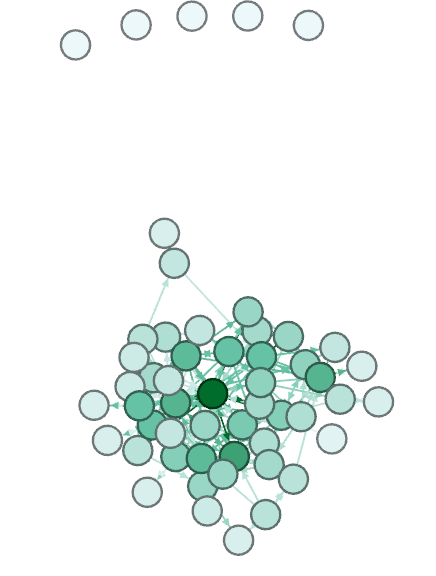

Some facts about the graph:

1.   Average degree = 3.377
2.   Connected components = 6
3.   Grapg density = 0.065
4.   Aigen centrality = mostly around 1


#Working with networkx

Number of nodes are:  52
Number of edges are:  179


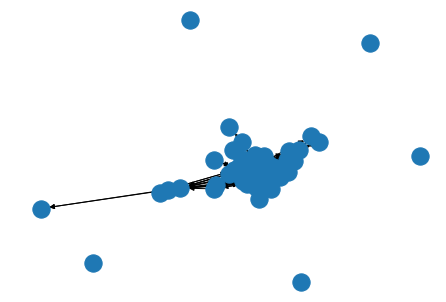

In [ ]:
import networkx as nx

G = nx.read_pajek('project.net')
nx.draw(G)
print("Number of nodes are: " ,G.number_of_nodes())
print("Number of edges are: " ,G.number_of_edges())

Note: 
For some reason the amount of nodes in gephi is one more then in networkx, i dont know why. Another thing to adress is that the intial file that was dowloaded was a .gephi and when converted to a .gml it arose a problem with some incoding it only worked in a .net file.

##Finding the degree centrality of the graph

The average degree centrality of all the nodes is:  0.13499245852187022
The sum of the degree centrality of this graph is:  7.019607843137252
The highest degree centrality from all the nodes is:  0.5098039215686274
The lowest degree centrality from all the nodes is:  0
The top ten values are:  [0.5098039215686274, 0.3529411764705882, 0.29411764705882354, 0.29411764705882354, 0.27450980392156865, 0.27450980392156865, 0.2549019607843137, 0.2549019607843137, 0.2549019607843137, 0.2549019607843137] 

The dict of all the degree centralities is presented now:  {'Schlegel': 0.21568627450980393, 'Albert Hager': 0.13725490196078433, 'Böger': 0.1568627450980392, 'Meier': 0.19607843137254902, 'Meinhold': 0.19607843137254902, 'Herold': 0.13725490196078433, 'Rettig': 0.09803921568627451, 'Meyer': 0.0, 'Schneider': 0.11764705882352941, 'Köchel': 0.0392156862745098, 'Wolf': 0.2549019607843137, 'Ernst': 0.0392156862745098, 'Trampler': 0.0392156862745098, 'Vetter': 0.3529411764705882, 'Pfeil': 0.509803

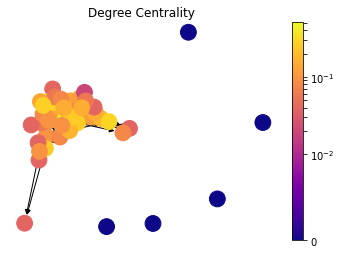

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

G = nx.read_pajek('project.net')
ans = nx.degree_centrality(G)
l = list(ans.values())
pos = nx.spring_layout(G, seed=675)


#diffrence top 10 
print("The average degree centrality of all the nodes is: ", avgCent(l))
print("The sum of the degree centrality of this graph is: ", sum(l))
print("The highest degree centrality from all the nodes is: ", highestCent(l))
print("The lowest degree centrality from all the nodes is: ", lowestCent(l))
print("The top ten values are: ", topTen(l),"\n")
print("The dict of all the degree centralities is presented now: ", ans, "\n")
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')


## Finding the Eigen vector centrality

The average Eigen centrality of all the nodes is:  0.08011788767998476
The sum of the Eigen centrality of this graph is:  4.1661301593592075
The highest Eigen centrality from all the nodes is:  0.4773147631035349
The lowest Eigen centrality from all the nodes is:  0
The top ten values are:  [0.4773147631035349, 0.39088649829938055, 0.32524793379548816, 0.31996648553413587, 0.30818788500852284, 0.2846038973683969, 0.21869009892764948, 0.18664174056155475, 0.16839110336442986, 0.15905009034952336] 

The dict of all the Eigen centralities is presented now:  {'Schlegel': 0.2846038973683969, 'Albert Hager': 0.09372419771356828, 'Böger': 0.022250196344453268, 'Meier': 0.11654952541957411, 'Meinhold': 0.30818788500852284, 'Herold': 0.16839110336442986, 'Rettig': 0.12014392417682133, 'Meyer': 3.084118772479098e-16, 'Schneider': 0.0617577856939533, 'Köchel': 0.027043695706593672, 'Wolf': 0.08797420960612475, 'Ernst': 0.011452303488595798, 'Trampler': 0.026026815220064222, 'Vetter': 0.4773147631

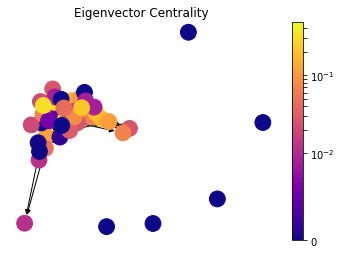

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

G = nx.read_pajek('project.net')
G2 = nx.DiGraph(G)
ans = nx.eigenvector_centrality(G2, max_iter=100)
pos = nx.spring_layout(G, seed=675)

l = list(ans.values())

print("The average Eigen centrality of all the nodes is: ", avgCent(l))
print("The sum of the Eigen centrality of this graph is: ", sum(l))
print("The highest Eigen centrality from all the nodes is: ", highestCent(l))
print("The lowest Eigen centrality from all the nodes is: ", lowestCent(l))
print("The top ten values are: ", topTen(l),"\n")
print("The dict of all the Eigen centralities is presented now: ", ans, "\n")
draw(G, pos, ans, 'Eigenvector Centrality')

##Finding Katz centality

The average Katz centrality of all the nodes is:  0.12735728945952665
The sum of the Katz centrality of this graph is:  6.622579051895386
The highest Katz centrality from all the nodes is:  0.31876457099785277
The lowest Katz centrality from all the nodes is:  0
The top ten values are:  [0.31876457099785277, 0.3038756753465998, 0.24530075309497001, 0.23608433876351423, 0.20776732046526186, 0.19416078045212687, 0.19363879260592, 0.17539829455695927, 0.16882477551170214, 0.1645035496935671] 

The dict of all the Katz centralities is presented now:  {'Schlegel': 0.20776732046526186, 'Albert Hager': 0.13212769165754726, 'Böger': 0.11456313817365041, 'Meier': 0.1343904613873962, 'Meinhold': 0.19363879260592, 'Herold': 0.1413284940113004, 'Rettig': 0.13984693423210617, 'Meyer': 0.07880062433912709, 'Schneider': 0.13924600980298302, 'Köchel': 0.09223966474848391, 'Wolf': 0.16882477551170214, 'Ernst': 0.09320634288485832, 'Trampler': 0.09821669687119022, 'Vetter': 0.3038756753465998, 'Pfeil': 

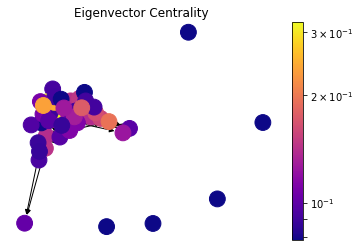

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
  
  nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                  node_color=list(measures.values()),
                                  nodelist=measures.keys())
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
  # labels = nx.draw_networkx_labels(G, pos)
  edges = nx.draw_networkx_edges(G, pos)

  plt.title(measure_name)
  plt.colorbar(nodes)
  plt.axis('off')
  plt.show()

G = nx.read_pajek('project.net')
G2 = nx.DiGraph(G)
ans = nx.katz_centrality(G2)
pos = nx.spring_layout(G, seed=675)

l = list(ans.values())

print("The average Katz centrality of all the nodes is: ", avgCent(l))
print("The sum of the Katz centrality of this graph is: ", sum(l))
print("The highest Katz centrality from all the nodes is: ", highestCent(l))
print("The lowest Katz centrality from all the nodes is: ", lowestCent(l))
print("The top ten values are: ", topTen(l),"\n")
print("The dict of all the Katz centralities is presented now: ", ans, "\n")
draw(G, pos,ans, 'Eigenvector Centrality')

##Finding the page rank

The average page rank of all the nodes is:  0.019230769230769225
The sum of the page rank of this graph is:  0.9999999999999998
The highest page rank from all the nodes is:  0.08685069849732535
The lowest page rank from all the nodes is:  0
The top ten values are:  [0.08685069849732535, 0.08464852634429476, 0.0582983948674497, 0.05454378060675546, 0.05298274024419864, 0.052658165865924644, 0.05026766059498374, 0.04410438586427778, 0.03893886503099042, 0.031545356647733586] 

The dict of all the page ranks is presented now:  {'Schlegel': 0.05026766059498374, 'Albert Hager': 0.01945061665088101, 'Böger': 0.007509019537398664, 'Meier': 0.030233769522331304, 'Meinhold': 0.05298274024419864, 'Herold': 0.023667841632906035, 'Rettig': 0.01794186821464812, 'Meyer': 0.00326711387546457, 'Schneider': 0.024886287620994485, 'Köchel': 0.007550268918489109, 'Wolf': 0.030826432574590563, 'Ernst': 0.00618255906374547, 'Trampler': 0.01317896134529984, 'Vetter': 0.08464852634429476, 'Pfeil': 0.086850698

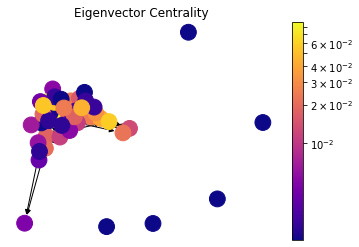

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

G = nx.read_pajek('project.net')
G2 = nx.DiGraph(G)
ans = nx.pagerank(G2)
pos = nx.spring_layout(G, seed=675)

l = list(ans.values())

print("The average page rank of all the nodes is: ", avgCent(l))
print("The sum of the page rank of this graph is: ", sum(l))
print("The highest page rank from all the nodes is: ", highestCent(l))
print("The lowest page rank from all the nodes is: ", lowestCent(l))
print("The top ten values are: ", topTen(l),"\n")
print("The dict of all the page ranks is presented now: ", ans, "\n")
draw(G, pos,ans, 'Eigenvector Centrality')


##Finding the betweeness centrality

The average page rank of all the nodes is:  0.0327526395173454
The sum of the page rank of this graph is:  1.7031372549019608
The highest page rank from all the nodes is:  0.20849644690821165
The lowest page rank from all the nodes is:  0
The top ten values are:  [0.20849644690821165, 0.1871610644257703, 0.11904450669156555, 0.11386383442265793, 0.08796122722593311, 0.0859980324686207, 0.08411826953003422, 0.0812689010336069, 0.06877993248581486, 0.06585287044110573] 

The dict of all the page ranks is presented now:  {'Schlegel': 0.0859980324686207, 'Albert Hager': 0.004871459694989107, 'Böger': 0.03789670677905971, 'Meier': 0.11904450669156555, 'Meinhold': 0.04831644825762472, 'Herold': 0.037342613813202044, 'Rettig': 0.05067263673146026, 'Meyer': 0.0, 'Schneider': 0.018927146927146928, 'Köchel': 0.0, 'Wolf': 0.05628919446566504, 'Ernst': 0.0, 'Trampler': 0.0, 'Vetter': 0.04948691722221133, 'Pfeil': 0.20849644690821165, 'Pröse': 0.0812689010336069, 'Holzmüller': 0.0006339869281045751

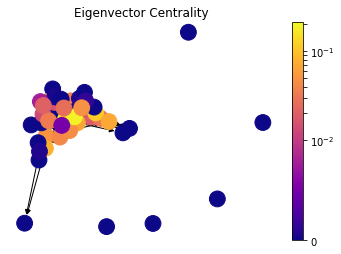

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

G = nx.read_pajek('project.net')
G2 = nx.DiGraph(G)
ans = nx.betweenness_centrality(G2)
pos = nx.spring_layout(G, seed=675)

l = list(ans.values())

print("The average page rank of all the nodes is: ", avgCent(l))
print("The sum of the page rank of this graph is: ", sum(l))
print("The highest page rank from all the nodes is: ", highestCent(l))
print("The lowest page rank from all the nodes is: ", lowestCent(l))
print("The top ten values are: ", topTen(l),"\n")
print("The dict of all the page ranks is presented now: ", ans, "\n")
draw(G, pos,ans, 'Eigenvector Centrality')


#Comparing the top ten values from all the centralities

###Top ten values in degree centrality are:

0.5098039215686274, 0.3529411764705882, 0.29411764705882354, 0.29411764705882354, 0.27450980392156865, 0.27450980392156865, 0.2549019607843137, 0.2549019607843137, 0.2549019607843137, 0.2549019607843137

###Top ten values of the eigen vector values:

0.4773147631035349, 0.39088649829938055, 0.32524793379548816, 0.31996648553413587, 0.30818788500852284, 0.2846038973683969, 0.21869009892764948, 0.18664174056155475, 0.16839110336442986, 0.15905009034952336

###Top ten values of katz centrality are:

0.31876457099785277, 0.3038756753465998, 0.24530075309497001, 0.23608433876351423, 0.20776732046526186, 0.19416078045212687, 0.19363879260592, 0.17539829455695927, 0.16882477551170214, 0.1645035496935671

###Top ten values of page rank are:

0.08685069849732535, 0.08464852634429476, 0.0582983948674497, 0.05454378060675546, 0.05298274024419864, 0.052658165865924644, 0.05026766059498374, 0.04410438586427778, 0.03893886503099042, 0.031545356647733586

###Top ten values for betweeness centrality:

0.20849644690821165, 0.1871610644257703, 0.11904450669156555, 0.11386383442265793, 0.08796122722593311, 0.0859980324686207, 0.08411826953003422, 0.0812689010336069, 0.06877993248581486, 0.06585287044110573







#The diffrence of all the ten 10 centralities

As we can see the top ten of all the centralities differ from each other. The degree centality and eigen vector centrality are similar. The differ abit but compared to all the other centralities they are faily similar. Aprart from these two somewhat similar centralities all the other centralities differ quiet abit from each other.

#What is the most popular/ least popular student moves away from the school

###Most popular kid leaving

The name of the student that has the most friends is called  Pfeil  he has  26  friends
Lets assume that  Pfeil  has to leave the school and never interect with his friends again
----------------------------------------------------------------------------------------------
Here is the graph where the most connected student left:


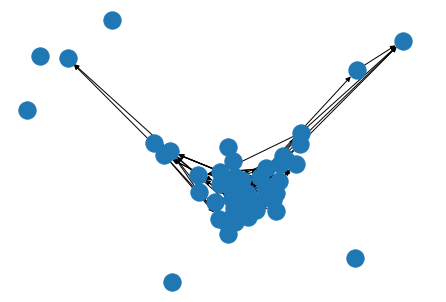

In [ ]:
import networkx as nx

def findMax(graph):
  value = []
  for i in degrees:
    value.append(i[1])

  mostFriends = 0
  for i in value:
    if i > mostFriends:
      mostFriends = i
  return mostFriends

def findTheName (val, degrees):
  names = None
  for i in degrees:
      if i[1] == val:
        names = i[0]
      
  return names

def removeNode(L):
  if L.has_node(name):
    L.remove_node(name)
  nx.draw(L)

G = nx.read_pajek('project.net')
degrees = G.degree(G)
highestVal = findMax(degrees)
name = findTheName(highestVal, degrees)
print("The name of the student that has the most friends is called ", name, " he has ", highestVal, " friends")
print("Lets assume that ", name, " has to leave the school and never interect with his friends again")
print("----------------------------------------------------------------------------------------------")
print("Here is the graph where the most connected student left:")
removeNode(G)


####Finding the degree centrality of the graph when the student left

The average degree centrality of all the nodes is:  0.11999999999999998
The sum of the degree centrality of this graph is:  6.119999999999999
The highest degree centrality from all the nodes is:  0.32
The lowest degree centrality from all the nodes is:  0
The top ten values are:  [0.32, 0.3, 0.26, 0.26, 0.26, 0.24, 0.24, 0.24, 0.24, 0.24] 

The dict of all the degree centralities is presented now:  {'Schlegel': 0.22, 'Albert Hager': 0.12, 'Böger': 0.16, 'Meier': 0.2, 'Meinhold': 0.18, 'Herold': 0.12, 'Rettig': 0.08, 'Meyer': 0.0, 'Schneider': 0.12, 'Köchel': 0.04, 'Wolf': 0.24, 'Ernst': 0.04, 'Trampler': 0.04, 'Vetter': 0.32, 'Pröse': 0.24, 'Holzmüller': 0.08, 'Eisenreich': 0.14, 'Pröhl': 0.04, 'Reinh. Zimmermann': 0.0, 'Schaller': 0.08, 'Stolze': 0.24, 'Schnabel': 0.26, 'Schmidt': 0.18, 'Fritzsche': 0.14, 'Röhling': 0.06, 'Rudolf': 0.04, 'Hofmann': 0.04, 'Kießling': 0.04, 'Räubert': 0.14, 'Haas': 0.1, 'Bernhardt': 0.04, 'Rausch': 0.08, 'Bernh. Schubert': 0.0, 'Flach': 0.02, 'Groß': 0.

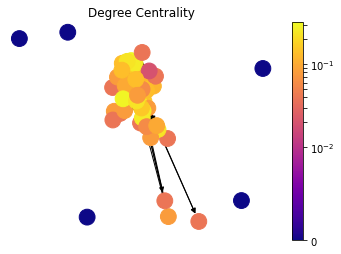

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

G = nx.read_pajek('project.net')
G.remove_node("Pfeil")
ans = nx.degree_centrality(G)
l = list(ans.values())
pos = nx.spring_layout(G, seed=675)


#diffrence top 10 
print("The average degree centrality of all the nodes is: ", avgCent(l))
print("The sum of the degree centrality of this graph is: ", sum(l))
print("The highest degree centrality from all the nodes is: ", highestCent(l))
print("The lowest degree centrality from all the nodes is: ", lowestCent(l))
print("The top ten values are: ", topTen(l),"\n")
print("The dict of all the degree centralities is presented now: ", ans, "\n")
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')


#### Finding the Eigen vector centrality when the student left


The average Eigen centrality of all the nodes is:  0.08606356621568484
The sum of the Eigen centrality of this graph is:  4.389241876999927
The highest Eigen centrality from all the nodes is:  0.49292886341162073
The lowest Eigen centrality from all the nodes is:  0
The top ten values are:  [0.49292886341162073, 0.3667940644805962, 0.32526765711990135, 0.3194649392445608, 0.2913156836736052, 0.24153406575163788, 0.23199405862657424, 0.1928851901274704, 0.1562696913671462, 0.1482695506890968] 

The dict of all the Eigen centralities is presented now:  {'Schlegel': 0.3667940644805962, 'Albert Hager': 0.08521668575611811, 'Böger': 0.03966536647499581, 'Meier': 0.1562696913671462, 'Meinhold': 0.2913156836736052, 'Herold': 0.09624083372967819, 'Rettig': 0.05757446720018902, 'Meyer': 1.0034486698124408e-18, 'Schneider': 0.14695615750224714, 'Köchel': 0.04461779381199876, 'Wolf': 0.1310875230587028, 'Ernst': 0.01773431589849333, 'Trampler': 0.06896478806467456, 'Vetter': 0.49292886341162073, 

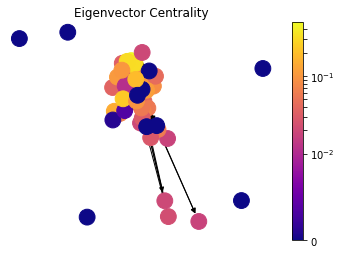

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

G = nx.read_pajek('project.net')
G.remove_node("Pfeil")
G2 = nx.DiGraph(G)
ans = nx.eigenvector_centrality(G2, max_iter=100)
pos = nx.spring_layout(G, seed=675)

l = list(ans.values())

print("The average Eigen centrality of all the nodes is: ", avgCent(l))
print("The sum of the Eigen centrality of this graph is: ", sum(l))
print("The highest Eigen centrality from all the nodes is: ", highestCent(l))
print("The lowest Eigen centrality from all the nodes is: ", lowestCent(l))
print("The top ten values are: ", topTen(l),"\n")
print("The dict of all the Eigen centralities is presented now: ", ans, "\n")
draw(G, pos, ans, 'Eigenvector Centrality')

####Finding the Katz cetrality when the student left

The average Katz centrality of all the nodes is:  0.13321691950794204
The sum of the Katz centrality of this graph is:  6.794062894905044
The highest Katz centrality from all the nodes is:  0.28905410139996157
The lowest Katz centrality from all the nodes is:  0
The top ten values are:  [0.28905410139996157, 0.23430199101503013, 0.22376394412942752, 0.22317011644873763, 0.22202470760297102, 0.19001777906767486, 0.17490088828743644, 0.1709426539886765, 0.16214276282912088, 0.1598020383369907] 

The dict of all the Katz centralities is presented now:  {'Schlegel': 0.22317011644873763, 'Albert Hager': 0.1438105639975572, 'Böger': 0.13157563360588823, 'Meier': 0.14902424735017208, 'Meinhold': 0.17490088828743644, 'Herold': 0.12129299353219679, 'Rettig': 0.12394317883569186, 'Meyer': 0.09084559303462124, 'Schneider': 0.1598020383369907, 'Köchel': 0.10574801171409778, 'Wolf': 0.19001777906767486, 'Ernst': 0.10705986690983604, 'Trampler': 0.11304805442955031, 'Vetter': 0.28905410139996157, 'P

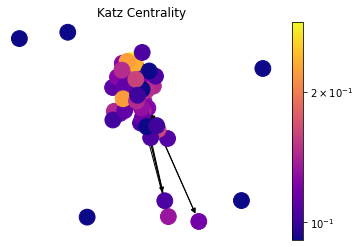

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
  
  nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                  node_color=list(measures.values()),
                                  nodelist=measures.keys())
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
  # labels = nx.draw_networkx_labels(G, pos)
  edges = nx.draw_networkx_edges(G, pos)

  plt.title(measure_name)
  plt.colorbar(nodes)
  plt.axis('off')
  plt.show()

G = nx.read_pajek('project.net')
G.remove_node("Pfeil")
G2 = nx.DiGraph(G)
ans = nx.katz_centrality(G2)
pos = nx.spring_layout(G, seed=675)

l = list(ans.values())

print("The average Katz centrality of all the nodes is: ", avgCent(l))
print("The sum of the Katz centrality of this graph is: ", sum(l))
print("The highest Katz centrality from all the nodes is: ", highestCent(l))
print("The lowest Katz centrality from all the nodes is: ", lowestCent(l))
print("The top ten values are: ", topTen(l),"\n")
print("The dict of all the Katz centralities is presented now: ", ans, "\n")
draw(G, pos,ans, 'Katz Centrality')

####Finding the page rank when the student left

The average page rank of all the nodes is:  0.01960784313725489
The sum of the page rank of this graph is:  0.9999999999999994
The highest page rank from all the nodes is:  0.09706716855095404
The lowest page rank from all the nodes is:  0
The top ten values are:  [0.09706716855095404, 0.06991671169673627, 0.06878926209573058, 0.06694655639446769, 0.06602136737154421, 0.05717712416739935, 0.04006643993922024, 0.0369543405144631, 0.035712623910664404, 0.03360644236843256] 

The dict of all the page ranks is presented now:  {'Schlegel': 0.06991671169673627, 'Albert Hager': 0.016322259763136306, 'Böger': 0.008559794066478034, 'Meier': 0.035712623910664404, 'Meinhold': 0.05717712416739935, 'Herold': 0.016861187560601416, 'Rettig': 0.01207979815481566, 'Meyer': 0.0035483520157369385, 'Schneider': 0.0322455353259988, 'Köchel': 0.008607474959845164, 'Wolf': 0.03360644236843256, 'Ernst': 0.006940860279563758, 'Trampler': 0.014930843844408813, 'Vetter': 0.09706716855095404, 'Pröse': 0.019955040

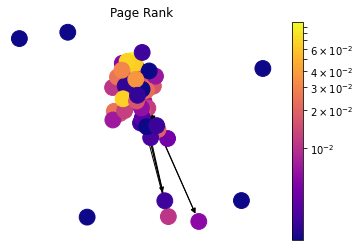

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

G = nx.read_pajek('project.net')
G.remove_node("Pfeil")
G2 = nx.DiGraph(G)
ans = nx.pagerank(G2)
pos = nx.spring_layout(G, seed=675)

l = list(ans.values())

print("The average page rank of all the nodes is: ", avgCent(l))
print("The sum of the page rank of this graph is: ", sum(l))
print("The highest page rank from all the nodes is: ", highestCent(l))
print("The lowest page rank from all the nodes is: ", lowestCent(l))
print("The top ten values are: ", topTen(l),"\n")
print("The dict of all the page ranks is presented now: ", ans, "\n")
draw(G, pos,ans, 'Page Rank')


####Finding the betweeness centrlity when the student left

The average page rank of all the nodes is:  0.03583833533413365
The sum of the page rank of this graph is:  1.8277551020408163
The highest page rank from all the nodes is:  0.20923134366528562
The lowest page rank from all the nodes is:  0
The top ten values are:  [0.20923134366528562, 0.18948406731113498, 0.18425961161406912, 0.10770753414147614, 0.09116618075801752, 0.08921865889212828, 0.08200161969549725, 0.08117349496189452, 0.07262424769406511, 0.07159717320512164] 

The dict of all the page ranks is presented now:  {'Schlegel': 0.18425961161406912, 'Albert Hager': 0.00748299319727891, 'Böger': 0.05241561386459346, 'Meier': 0.18948406731113498, 'Meinhold': 0.07262424769406511, 'Herold': 0.026245085502872825, 'Rettig': 0.018030535522479667, 'Meyer': 0.0, 'Schneider': 0.021752186588921286, 'Köchel': 0.0, 'Wolf': 0.06065490256252877, 'Ernst': 0.0, 'Trampler': 0.0, 'Vetter': 0.07159717320512164, 'Pröse': 0.08200161969549725, 'Holzmüller': 0.0, 'Eisenreich': 0.00020408163265306123, 'P

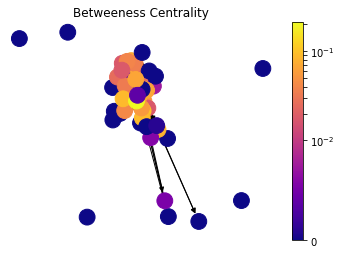

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

G = nx.read_pajek('project.net')
G.remove_node("Pfeil")
G2 = nx.DiGraph(G)
ans = nx.betweenness_centrality(G2)
pos = nx.spring_layout(G, seed=675)

l = list(ans.values())

print("The average page rank of all the nodes is: ", avgCent(l))
print("The sum of the page rank of this graph is: ", sum(l))
print("The highest page rank from all the nodes is: ", highestCent(l))
print("The lowest page rank from all the nodes is: ", lowestCent(l))
print("The top ten values are: ", topTen(l),"\n")
print("The dict of all the page ranks is presented now: ", ans, "\n")
draw(G, pos,ans, 'Betweeness Centrality')


###Least popular kids leaving

The names of the students that have the least amount of friends are called  Meyer Reinh. Zimmermann Bernh. Schubert Hergert Neidhardt  they have  0  friends
Lets assume that  Meyer Reinh. Zimmermann Bernh. Schubert Hergert Neidhardt  has to leave the school and never interect with his friends again
----------------------------------------------------------------------------------------------
Here is the graph where the most connected student left:


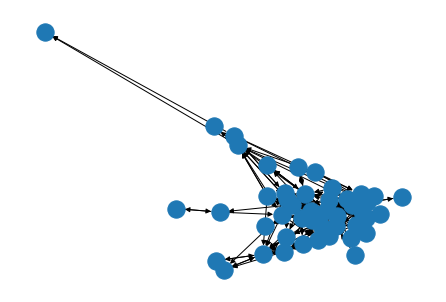

In [ ]:
import networkx as nx

def findTheNames (val, degrees):
  names = []
  for i in degrees:
      if i[1] == val:
        names.append(i[0])
  return names

def removeNode(L, a):
  for l in a:
    if L.has_node(l):
      L.remove_node(l)
  nx.draw(L)

G = nx.read_pajek('project.net')
degrees = G.degree(G)
highestVal = 0
name = findTheNames(highestVal, degrees)
print("The names of the students that have the least amount of friends are called ", ' '.join([str(elem) for elem in name]), " they have ", highestVal, " friends")
print("Lets assume that ", ' '.join([str(elem) for elem in name]), " has to leave the school and never interect with his friends again")
print("----------------------------------------------------------------------------------------------")
print("Here is the graph where the most connected student left:")
removeNode(G, name)


####Finding the degree centrality of the graph when the students have left

The average degree centrality of all the nodes is:  0.16558741905642924
The sum of the degree centrality of this graph is:  7.782608695652174
The highest degree centrality from all the nodes is:  0.5652173913043478
The lowest degree centrality from all the nodes is:  0
The top ten values are:  [0.5652173913043478, 0.3913043478260869, 0.32608695652173914, 0.32608695652173914, 0.30434782608695654, 0.30434782608695654, 0.2826086956521739, 0.2826086956521739, 0.2826086956521739, 0.2826086956521739] 

The dict of all the degree centralities is presented now:  {'Schlegel': 0.2391304347826087, 'Albert Hager': 0.15217391304347827, 'Böger': 0.17391304347826086, 'Meier': 0.21739130434782608, 'Meinhold': 0.21739130434782608, 'Herold': 0.15217391304347827, 'Rettig': 0.10869565217391304, 'Schneider': 0.13043478260869565, 'Köchel': 0.043478260869565216, 'Wolf': 0.2826086956521739, 'Ernst': 0.043478260869565216, 'Trampler': 0.043478260869565216, 'Vetter': 0.3913043478260869, 'Pfeil': 0.56521739130434

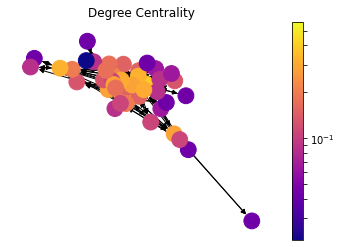

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

G = nx.read_pajek('project.net')
name = ['Meyer', 'Reinh. Zimmermann', 'Bernh. Schubert', 'Hergert', 'Neidhardt']
for l in name:
  G.remove_node(l)
ans = nx.degree_centrality(G)
l = list(ans.values())
pos = nx.spring_layout(G, seed=675)


#diffrence top 10 
print("The average degree centrality of all the nodes is: ", avgCent(l))
print("The sum of the degree centrality of this graph is: ", sum(l))
print("The highest degree centrality from all the nodes is: ", highestCent(l))
print("The lowest degree centrality from all the nodes is: ", lowestCent(l))
print("The top ten values are: ", topTen(l),"\n")
print("The dict of all the degree centralities is presented now: ", ans, "\n")
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')


#### Finding the Eigen vector centrality when the students left


The average Eigen centrality of all the nodes is:  0.08864106722040863
The sum of the Eigen centrality of this graph is:  4.166130159359206
The highest Eigen centrality from all the nodes is:  0.4773147631035349
The lowest Eigen centrality from all the nodes is:  0
The top ten values are:  [0.4773147631035349, 0.3908864982993805, 0.3252479337954881, 0.3199664855341358, 0.30818788500852284, 0.2846038973683969, 0.21869009892764948, 0.18664174056155478, 0.16839110336442986, 0.15905009034952336] 

The dict of all the Eigen centralities is presented now:  {'Schlegel': 0.2846038973683969, 'Albert Hager': 0.09372419771356827, 'Böger': 0.02225019634445326, 'Meier': 0.11654952541957411, 'Meinhold': 0.30818788500852284, 'Herold': 0.16839110336442986, 'Rettig': 0.12014392417682138, 'Schneider': 0.0617577856939533, 'Köchel': 0.027043695706593672, 'Wolf': 0.08797420960612473, 'Ernst': 0.011452303488595798, 'Trampler': 0.02602681522006422, 'Vetter': 0.4773147631035349, 'Pfeil': 0.3908864982993805, '

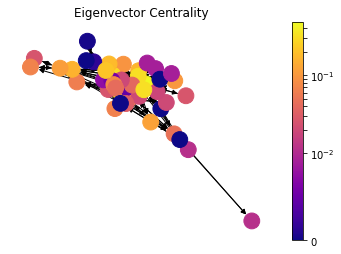

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

G = nx.read_pajek('project.net')
name = ['Meyer', 'Reinh. Zimmermann', 'Bernh. Schubert', 'Hergert', 'Neidhardt']
for l in name:
  G.remove_node(l)
G2 = nx.DiGraph(G)
ans = nx.eigenvector_centrality(G2, max_iter=100)
pos = nx.spring_layout(G, seed=675)

l = list(ans.values())

print("The average Eigen centrality of all the nodes is: ", avgCent(l))
print("The sum of the Eigen centrality of this graph is: ", sum(l))
print("The highest Eigen centrality from all the nodes is: ", highestCent(l))
print("The lowest Eigen centrality from all the nodes is: ", lowestCent(l))
print("The top ten values are: ", topTen(l),"\n")
print("The dict of all the Eigen centralities is presented now: ", ans, "\n")
draw(G, pos, ans, 'Eigenvector Centrality')

####Finding the Katz cetrality when the students left

The average Katz centrality of all the nodes is:  0.13462933618628314
The sum of the Katz centrality of this graph is:  6.327578800755307
The highest Katz centrality from all the nodes is:  0.3238313162561362
The lowest Katz centrality from all the nodes is:  0
The top ten values are:  [0.3238313162561362, 0.30870576243046344, 0.2491997950233331, 0.23983688629488048, 0.21106977055404766, 0.19724695533856698, 0.19671667052436154, 0.1781862407658981, 0.17150823599831452, 0.16711832453435796] 

The dict of all the Katz centralities is presented now:  {'Schlegel': 0.21106977055404766, 'Albert Hager': 0.13422785402219828, 'Böger': 0.11638411293034419, 'Meier': 0.13652659035198458, 'Meinhold': 0.19671667052436154, 'Herold': 0.14357490262142453, 'Rettig': 0.14206979353133103, 'Schneider': 0.14145931744158163, 'Köchel': 0.09370580912747509, 'Wolf': 0.17150823599831452, 'Ernst': 0.0946878525594607, 'Trampler': 0.09977784584580358, 'Vetter': 0.30870576243046344, 'Pfeil': 0.3238313162561362, 'Prö

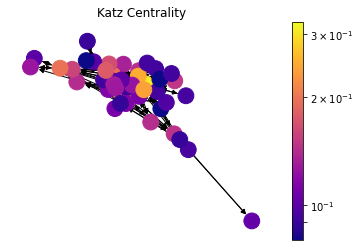

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
  
  nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                  node_color=list(measures.values()),
                                  nodelist=measures.keys())
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
  # labels = nx.draw_networkx_labels(G, pos)
  edges = nx.draw_networkx_edges(G, pos)

  plt.title(measure_name)
  plt.colorbar(nodes)
  plt.axis('off')
  plt.show()

G = nx.read_pajek('project.net')
name = ['Meyer', 'Reinh. Zimmermann', 'Bernh. Schubert', 'Hergert', 'Neidhardt']
for l in name:
  G.remove_node(l)
G2 = nx.DiGraph(G)
ans = nx.katz_centrality(G2)
pos = nx.spring_layout(G, seed=675)

l = list(ans.values())

print("The average Katz centrality of all the nodes is: ", avgCent(l))
print("The sum of the Katz centrality of this graph is: ", sum(l))
print("The highest Katz centrality from all the nodes is: ", highestCent(l))
print("The lowest Katz centrality from all the nodes is: ", lowestCent(l))
print("The top ten values are: ", topTen(l),"\n")
print("The dict of all the Katz centralities is presented now: ", ans, "\n")
draw(G, pos,ans, 'Katz Centrality')

####Finding the page rank when the students left

The average page rank of all the nodes is:  0.021276595744680844
The sum of the page rank of this graph is:  0.9999999999999997
The highest page rank from all the nodes is:  0.0882917891198591
The lowest page rank from all the nodes is:  0
The top ten values are:  [0.0882917891198591, 0.08605424991381669, 0.05927696213989678, 0.05544858984092003, 0.053862918862932936, 0.053532565664873126, 0.051102231410459525, 0.04483615707515707, 0.03958550749899804, 0.03207072813752275] 

The dict of all the page ranks is presented now:  {'Schlegel': 0.051102231410459525, 'Albert Hager': 0.01977303860777886, 'Böger': 0.007633517008451886, 'Meier': 0.030735328829136453, 'Meinhold': 0.053862918862932936, 'Herold': 0.02406070857124755, 'Rettig': 0.018239448816705178, 'Schneider': 0.025297390263520084, 'Köchel': 0.0076756096533826396, 'Wolf': 0.0313380591692138, 'Ernst': 0.006285056867681665, 'Trampler': 0.01339659219536089, 'Vetter': 0.08605424991381669, 'Pfeil': 0.0882917891198591, 'Pröse': 0.02091983

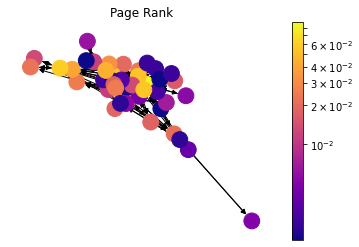

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

G = nx.read_pajek('project.net')
name = ['Meyer', 'Reinh. Zimmermann', 'Bernh. Schubert', 'Hergert', 'Neidhardt']
for l in name:
  G.remove_node(l)
G2 = nx.DiGraph(G)
ans = nx.pagerank(G2)
pos = nx.spring_layout(G, seed=675)

l = list(ans.values())

print("The average page rank of all the nodes is: ", avgCent(l))
print("The sum of the page rank of this graph is: ", sum(l))
print("The highest page rank from all the nodes is: ", highestCent(l))
print("The lowest page rank from all the nodes is: ", lowestCent(l))
print("The top ten values are: ", topTen(l),"\n")
print("The dict of all the page ranks is presented now: ", ans, "\n")
draw(G, pos,ans, 'Page Rank')


####Finding the betweeness centrlity when the students left

The average page rank of all the nodes is:  0.04463973686915408
The sum of the page rank of this graph is:  2.098067632850242
The highest page rank from all the nodes is:  0.2568434490898259
The lowest page rank from all the nodes is:  0
The top ten values are:  [0.2568434490898259, 0.23056073153899237, 0.14664902998236337, 0.14026704240472354, 0.10835803353919297, 0.10593960521496752, 0.1036239552181581, 0.10011386359212446, 0.08472890233759801, 0.08112310126802881] 

The dict of all the page ranks is presented now:  {'Schlegel': 0.10593960521496752, 'Albert Hager': 0.0060010735373054215, 'Böger': 0.046684348930725726, 'Meier': 0.14664902998236337, 'Meinhold': 0.05952026234634929, 'Herold': 0.046001770639451794, 'Rettig': 0.06242281336484235, 'Schneider': 0.023316050562427377, 'Köchel': 0.0, 'Wolf': 0.06934176129828303, 'Ernst': 0.0, 'Trampler': 0.0, 'Vetter': 0.060962144404173385, 'Pfeil': 0.2568434490898259, 'Pröse': 0.10011386359212446, 'Holzmüller': 0.0007809983896940418, 'Eisenre

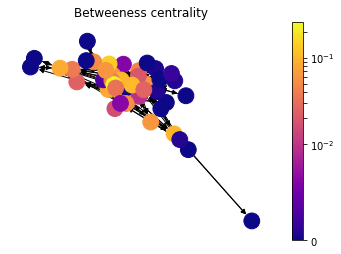

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

G = nx.read_pajek('project.net')
name = ['Meyer', 'Reinh. Zimmermann', 'Bernh. Schubert', 'Hergert', 'Neidhardt']
for l in name:
  G.remove_node(l)
G2 = nx.DiGraph(G)
ans = nx.betweenness_centrality(G2)
pos = nx.spring_layout(G, seed=675)

l = list(ans.values())

print("The average page rank of all the nodes is: ", avgCent(l))
print("The sum of the page rank of this graph is: ", sum(l))
print("The highest page rank from all the nodes is: ", highestCent(l))
print("The lowest page rank from all the nodes is: ", lowestCent(l))
print("The top ten values are: ", topTen(l),"\n")
print("The dict of all the page ranks is presented now: ", ans, "\n")
draw(G, pos,ans, 'Betweeness centrality')


###Conclusion

When we compare the results that we get from the scenario when the popular kid leaves and or the most unpopular kids leave we get a very strong change to the centralities and the look of the graphs. For example when the most popular kid left, the average degree centrality was: 0.11999999999999998, when the least popular kids left the average degree centrality was: 0.16558741905642924 and the degree centrality when no one left was: 0.13499245852187022. Ofcourse the degree centrlity droped the most when the most popular (in terms of graphs most connected) person left. However its very intresting to see that when we took out people that had no friends aka the unpopular kids the centrality averge dropde quiet abit.

#Friendship growth with time

Here i will simulate a scinario where if two friends have other friends the other friends will be friends as well. Lets start with a 50/50 chance.

Number of nodes are:  52
Number of edges are:  492
Amount of new friendships:  313


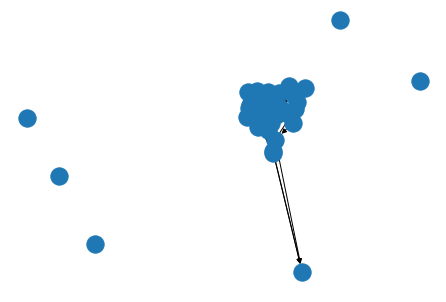

In [ ]:
import networkx as nx
import random

def creatingNewFriends (graph):
  for l in graph:
    neighbor = list(G[l].keys())
    for j in neighbor:
      non = list(G[j].keys())
      for k in non:
        rand = random.randint(1,101)
        if rand <= 25:
          graph.add_edge(l,k)
  
  nx.draw(graph)
  print("Number of nodes are: " ,graph.number_of_nodes())
  print("Number of edges are: " ,graph.number_of_edges())
  print('Amount of new friendships: ', graph.number_of_edges() -  179)


    
G = nx.read_pajek('project.net')
G = creatingNewFriends(G)


Lets see how these new friendships and connections effects the centralities

####Finding the degree centrality with new friendships

The average degree centrality of all the nodes is:  0.36123680241327283
The sum of the degree centrality of this graph is:  18.784313725490186
The highest degree centrality from all the nodes is:  1.2156862745098038
The lowest degree centrality from all the nodes is:  0
The top ten values are:  [1.2156862745098038, 1.0980392156862746, 0.9803921568627451, 0.8823529411764706, 0.8431372549019608, 0.8431372549019608, 0.803921568627451, 0.7647058823529411, 0.6274509803921569, 0.6078431372549019] 

The dict of all the degree centralities is presented now:  {'Schlegel': 0.6274509803921569, 'Albert Hager': 0.29411764705882354, 'Böger': 0.39215686274509803, 'Meier': 0.39215686274509803, 'Meinhold': 0.6078431372549019, 'Herold': 0.43137254901960786, 'Rettig': 0.3529411764705882, 'Meyer': 0.0, 'Schneider': 0.2549019607843137, 'Köchel': 0.3529411764705882, 'Wolf': 0.49019607843137253, 'Ernst': 0.0784313725490196, 'Trampler': 0.11764705882352941, 'Vetter': 0.8823529411764706, 'Pfeil': 1.21568627450

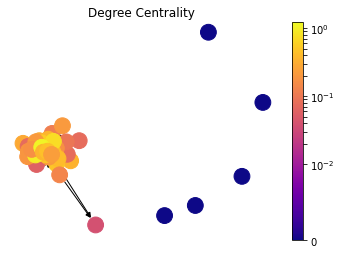

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def creatingNewFriends (graph):
  for l in graph:
    neighbor = list(G[l].keys())
    for j in neighbor:
      non = list(G[j].keys())
      for k in non:
        rand = random.randint(1,101)
        if rand <= 25:
          graph.add_edge(l,k)

  ans = nx.degree_centrality(graph)
  l = list(ans.values())
  pos = nx.spring_layout(G, seed=675)

  print("The average degree centrality of all the nodes is: ", avgCent(l))
  print("The sum of the degree centrality of this graph is: ", sum(l))
  print("The highest degree centrality from all the nodes is: ", highestCent(l))
  print("The lowest degree centrality from all the nodes is: ", lowestCent(l))
  print("The top ten values are: ", topTen(l),"\n")
  print("The dict of all the degree centralities is presented now: ", ans, "\n")
  draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

  
  
def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()


    
G = nx.read_pajek('project.net')
G = creatingNewFriends(G)


####Finding the Eigen Vector centrality with new friendships

The average Eigen Vector centrality of all the nodes is:  0.08959596761919017
The sum of the Eigen Vector centrality of this graph is:  4.6589903161978885
The highest Eigen Vector centrality from all the nodes is:  0.39112311854645054
The lowest Eigen Vector centrality from all the nodes is:  0
The top ten values are:  [0.39112311854645054, 0.37304470635212955, 0.3547293193389934, 0.3007474965935691, 0.2589045155702662, 0.24580777010278818, 0.2424863816672728, 0.230874099398342, 0.1983273373283799, 0.16505118325860477] 

The dict of all the Eigen Vector centrality is presented now:  {'Schlegel': 0.230874099398342, 'Albert Hager': 0.08238810657890439, 'Böger': 0.07901901279639834, 'Meier': 0.24580777010278818, 'Meinhold': 0.1983273373283799, 'Herold': 0.1543332879312748, 'Rettig': 0.1319076818610105, 'Meyer': 2.886760899085195e-15, 'Schneider': 0.10791233289825404, 'Köchel': 0.040429343171610475, 'Wolf': 0.2589045155702662, 'Ernst': 0.00825050050562535, 'Trampler': 0.018810260459669253,

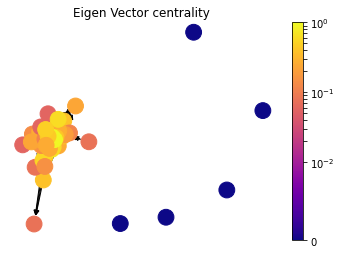

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def creatingNewFriends (graph):
  for l in graph:
    neighbor = list(G[l].keys())
    for j in neighbor:
      non = list(G[j].keys())
      for k in non:
        rand = random.randint(1,101)
        if rand <= 25:
          graph.add_edge(l,k)

  G2 = nx.DiGraph(graph)
  ans = nx.eigenvector_centrality(G2, max_iter=100)
  pos = nx.spring_layout(G, seed=675)

  l = list(ans.values())
  print("The average Eigen Vector centrality of all the nodes is: ", avgCent(l))
  print("The sum of the Eigen Vector centrality of this graph is: ", sum(l))
  print("The highest Eigen Vector centrality from all the nodes is: ", highestCent(l))
  print("The lowest Eigen Vector centrality from all the nodes is: ", lowestCent(l))
  print("The top ten values are: ", topTen(l),"\n")
  print("The dict of all the Eigen Vector centrality is presented now: ", ans, "\n")
  draw(G, pos, nx.degree_centrality(G), 'Eigen Vector centrality')

  
  
def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()


    
G = nx.read_pajek('project.net')
G = creatingNewFriends(G)


####Finding the Katz centrality with new friendships

The average Katz centrality of all the nodes is:  0.10762795680554864
The sum of the Katz centrality of this graph is:  5.596653753888529
The highest Katz centrality from all the nodes is:  0.3382706809320053
The lowest Katz centrality from all the nodes is:  0
The top ten values are:  [0.3382706809320053, 0.3228303446007086, 0.31199427819204745, 0.2752364565926809, 0.24868062264242566, 0.23842903588166414, 0.22807313006856175, 0.20701341180317887, 0.20180400397887027, 0.19716591561961289] 

The dict of all the Katz centralities is presented now:  {'Schlegel': 0.19491517111762027, 'Albert Hager': 0.17235672997614526, 'Böger': 0.051516426768891725, 'Meier': 0.11871470751186897, 'Meinhold': 0.2752364565926809, 'Herold': 0.20701341180317887, 'Rettig': 0.10623967432061038, 'Meyer': 0.028799663583659416, 'Schneider': 0.14980525449685017, 'Köchel': 0.04067113130173347, 'Wolf': 0.12583163002444955, 'Ernst': 0.06260496137638293, 'Trampler': 0.08009513788129208, 'Vetter': 0.3228303446007086, 'P

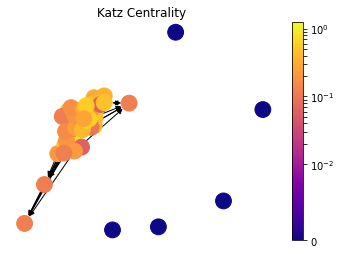

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def creatingNewFriends (graph):
  for l in graph:
    neighbor = list(G[l].keys())
    for j in neighbor:
      non = list(G[j].keys())
      for k in non:
        rand = random.randint(1,101)
        if rand <= 25:
          graph.add_edge(l,k)

  G2 = nx.DiGraph(G)
  ans = nx.katz_centrality(G2)
  pos = nx.spring_layout(G, seed=675)

  l = list(ans.values())
  print("The average Katz centrality of all the nodes is: ", avgCent(l))
  print("The sum of the Katz centrality of this graph is: ", sum(l))
  print("The highest Katz centrality from all the nodes is: ", highestCent(l))
  print("The lowest Katz centrality from all the nodes is: ", lowestCent(l))
  print("The top ten values are: ", topTen(l),"\n")
  print("The dict of all the Katz centralities is presented now: ", ans, "\n")
  draw(G, pos, nx.degree_centrality(G), 'Katz Centrality')

  
  
def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()


    
G = nx.read_pajek('project.net')
G = creatingNewFriends(G)


####Finding the page rank whith new friendships

The average page rank of all the nodes is:  0.019230769230769235
The sum of the page rank of this graph is:  1.0000000000000002
The highest page rank from all the nodes is:  0.07099579010667971
The lowest page rank from all the nodes is:  0
The top ten values are:  [0.07099579010667971, 0.060794658988905965, 0.05658138886533401, 0.0558232058015599, 0.0492699067022585, 0.047748404233337406, 0.04199369948964434, 0.04097173404320348, 0.03636537367093711, 0.036052572564343896] 

The dict of all the page ranks is presented now:  {'Schlegel': 0.03636537367093711, 'Albert Hager': 0.014265293639541656, 'Böger': 0.007689278381168421, 'Meier': 0.0276497100206468, 'Meinhold': 0.03525418568593358, 'Herold': 0.036052572564343896, 'Rettig': 0.0264415673430903, 'Meyer': 0.003223300725122496, 'Schneider': 0.04097173404320348, 'Köchel': 0.014107615999021019, 'Wolf': 0.028859184922885552, 'Ernst': 0.004506900326891832, 'Trampler': 0.024765441930754476, 'Vetter': 0.07099579010667971, 'Pfeil': 0.055823205

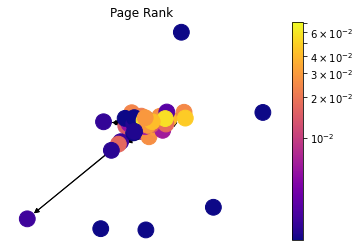

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def creatingNewFriends (graph):
  for l in graph:
    neighbor = list(G[l].keys())
    for j in neighbor:
      non = list(G[j].keys())
      for k in non:
        rand = random.randint(1,101)
        if rand <= 25:
          graph.add_edge(l,k)

  G2 = nx.DiGraph(G)
  ans = nx.pagerank(G2)
  pos = nx.spring_layout(G, seed=675)

  l = list(ans.values())

  print("The average page rank of all the nodes is: ", avgCent(l))
  print("The sum of the page rank of this graph is: ", sum(l))
  print("The highest page rank from all the nodes is: ", highestCent(l))
  print("The lowest page rank from all the nodes is: ", lowestCent(l))
  print("The top ten values are: ", topTen(l),"\n")
  print("The dict of all the page ranks is presented now: ", ans, "\n")
  draw(G, pos,ans, 'Page Rank')


  
  
def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()


    
G = nx.read_pajek('project.net')
G = creatingNewFriends(G)


####Finding the betweeness centrality with new friendships

The average page rank of all the nodes is:  0.022088989441930613
The sum of the page rank of this graph is:  1.148627450980392
The highest page rank from all the nodes is:  0.17639003876055417
The lowest page rank from all the nodes is:  0
The top ten values are:  [0.17639003876055417, 0.10039492640075412, 0.09614186651757223, 0.07415114120923628, 0.07022039851155677, 0.06744579106789997, 0.05798992164576756, 0.04975184993783608, 0.04448483814660285, 0.03853148013146191] 

The dict of all the page ranks is presented now:  {'Schlegel': 0.07415114120923628, 'Albert Hager': 0.0012821296350708116, 'Böger': 0.034346232726445804, 'Meier': 0.09614186651757223, 'Meinhold': 0.010773096728979078, 'Herold': 0.02411868214513452, 'Rettig': 0.02011311473454071, 'Meyer': 0.0, 'Schneider': 0.009524251155739046, 'Köchel': 0.0, 'Wolf': 0.03403986555543649, 'Ernst': 0.0027944586878751875, 'Trampler': 0.0, 'Vetter': 0.020045771036938404, 'Pfeil': 0.10039492640075412, 'Pröse': 0.06744579106789997, 'Holzmül

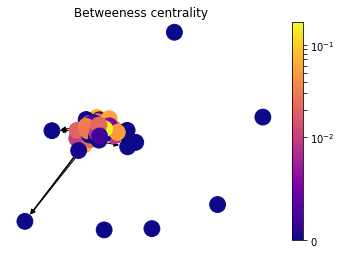

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def creatingNewFriends (graph):
  for l in graph:
    neighbor = list(G[l].keys())
    for j in neighbor:
      non = list(G[j].keys())
      for k in non:
        rand = random.randint(1,101)
        if rand <= 25:
          graph.add_edge(l,k)

  G2 = nx.DiGraph(G)
  ans = nx.betweenness_centrality(G2)
  pos = nx.spring_layout(G, seed=675)

  l = list(ans.values())

  print("The average page rank of all the nodes is: ", avgCent(l))
  print("The sum of the page rank of this graph is: ", sum(l))
  print("The highest page rank from all the nodes is: ", highestCent(l))
  print("The lowest page rank from all the nodes is: ", lowestCent(l))
  print("The top ten values are: ", topTen(l),"\n")
  print("The dict of all the page ranks is presented now: ", ans, "\n")
  draw(G, pos,ans, 'Betweeness centrality')


  
  
def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()


    
G = nx.read_pajek('project.net')
G = creatingNewFriends(G)


#Popularisation of unpopular kids

In this scenario lets assume that the most unpopular kids become the most famous and popular kids. 

The names of the students that have the least amount of friends are called  Meyer Reinh. Zimmermann Bernh. Schubert Hergert Neidhardt  they have  0  friends
----------------------------------------------------------------------------------------------
Number of nodes are:  52
Number of edges are:  280
Amount of new friendships:  101
----------------------------------------------------------------------------------------------
Meyer  has  16  new friends
Reinh. Zimmermann  has  30  new friends
Bernh. Schubert  has  22  new friends
Hergert  has  23  new friends
Neidhardt  has  20  new friends


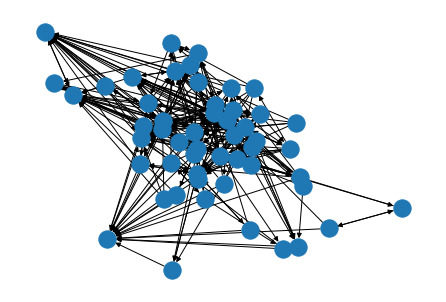

In [ ]:
import networkx as nx
import random


def findTheNames (val, degrees):
  names = []
  for i in degrees:
      if i[1] == val:
        names.append(i[0])
  return names



def newFriendsWithWierdKids (graph, wk):
  for k in wk:
    for l in graph:
      rand = random.randint(1,101)
      if rand <= 40:
        graph.add_edge(l,k)
  
  nx.draw(graph)
  print("Number of nodes are: " ,graph.number_of_nodes())
  print("Number of edges are: " ,graph.number_of_edges())
  print('Amount of new friendships: ', graph.number_of_edges() -  179)
  print("----------------------------------------------------------------------------------------------")

  for l in wk:
    print(l, " has ", G.degree[l], " new friends")

G = nx.read_pajek('project.net')
degrees = G.degree(G)
highestVal = 0
name = findTheNames(highestVal, degrees)
print("The names of the students that have the least amount of friends are called ", ' '.join([str(elem) for elem in name]), " they have ", highestVal, " friends")
print("----------------------------------------------------------------------------------------------")
G = newFriendsWithWierdKids(G,name)



####Finding the degree centrality with popularization

['Meyer', 'Reinh. Zimmermann', 'Bernh. Schubert', 'Hergert', 'Neidhardt']
The average degree centrality of all the nodes is:  0.2254901960784313
The sum of the degree centrality of this graph is:  11.725490196078427
The highest degree centrality from all the nodes is:  0.6666666666666666
The lowest degree centrality from all the nodes is:  0
The top ten values are:  [0.6666666666666666, 0.6078431372549019, 0.5882352941176471, 0.5098039215686274, 0.5098039215686274, 0.43137254901960786, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3137254901960784] 

The dict of all the degree centralities is presented now:  {'Schlegel': 0.27450980392156865, 'Albert Hager': 0.1764705882352941, 'Böger': 0.1764705882352941, 'Meier': 0.23529411764705882, 'Meinhold': 0.23529411764705882, 'Herold': 0.19607843137254902, 'Rettig': 0.1568627450980392, 'Meyer': 0.6666666666666666, 'Schneider': 0.1764705882352941, 'Köchel': 0.0784313725490196, 'Wolf': 0.29411764705882354, 'Ernst': 0.0980392156862

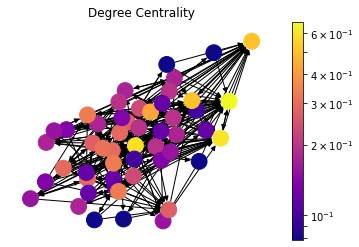

In [ ]:
import networkx as nx
import random

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(graph, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(graph, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(graph, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()



def findTheNames (val, degrees):
  names = []
  for i in degrees:
      if i[1] == val:
        names.append(i[0])
  return names



def newFriendsWithWierdKids (graph, wk):
  for k in wk:
    for l in graph:
      rand = random.randint(1,101)
      if rand <= 40:
        graph.add_edge(l,k)
  
  ans = nx.degree_centrality(graph)
  l = list(ans.values())
  pos = nx.spring_layout(graph, seed=675)


  #diffrence top 10 
  print("The average degree centrality of all the nodes is: ", avgCent(l))
  print("The sum of the degree centrality of this graph is: ", sum(l))
  print("The highest degree centrality from all the nodes is: ", highestCent(l))
  print("The lowest degree centrality from all the nodes is: ", lowestCent(l))
  print("The top ten values are: ", topTen(l),"\n")
  print("The dict of all the degree centralities is presented now: ", ans, "\n")
  draw(graph, pos, nx.degree_centrality(graph), 'Degree Centrality')


G = nx.read_pajek('project.net')
degrees = G.degree(G)
highestVal = 0
name = findTheNames(highestVal, degrees)
print(name)
G = newFriendsWithWierdKids(G,name)



####Finding the Eigen vector centrlity with popularization

The average Eigen centrality of all the nodes is:  0.07861665015795519
The sum of the Eigen centrality of this graph is:  4.08806580821367
The highest Eigen centrality from all the nodes is:  0.44964467338733666
The lowest Eigen centrality from all the nodes is:  0
The top ten values are:  [0.44964467338733666, 0.425017582076517, 0.40124439732369876, 0.3408069894422764, 0.2581903859994893, 0.2177978301089524, 0.21143937644353655, 0.17593398751418488, 0.17307713230952174, 0.16670582001976936] 

The dict of all the Eigen centralities is presented now:  {'Schlegel': 0.15394870596652035, 'Albert Hager': 0.05069754521694876, 'Böger': 0.012035636076675685, 'Meier': 0.06304428289725839, 'Meinhold': 0.16670582001976936, 'Herold': 0.09108656873265704, 'Rettig': 0.06498857474470844, 'Meyer': 0.425017582076517, 'Schneider': 0.033406187613218306, 'Köchel': 0.014628548649821643, 'Wolf': 0.04758724617800767, 'Ernst': 0.006194810818500638, 'Trampler': 0.014078494920862415, 'Vetter': 0.258190385999489

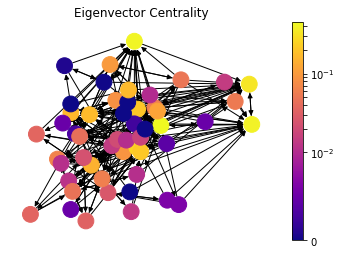

In [ ]:
import networkx as nx
import random

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(graph, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(graph, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(graph, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()


def findTheNames (val, degrees):
  names = []
  for i in degrees:
      if i[1] == val:
        names.append(i[0])
  return names



def newFriendsWithWierdKids (graph, wk):
  for k in wk:
    for l in graph:
      rand = random.randint(1,101)
      if rand <= 40:
        graph.add_edge(l,k)

  G2 = nx.DiGraph(graph)
  ans = nx.eigenvector_centrality(G2, max_iter=100)
  pos = nx.spring_layout(graph, seed=675)

  l = list(ans.values())

  print("The average Eigen centrality of all the nodes is: ", avgCent(l))
  print("The sum of the Eigen centrality of this graph is: ", sum(l))
  print("The highest Eigen centrality from all the nodes is: ", highestCent(l))
  print("The lowest Eigen centrality from all the nodes is: ", lowestCent(l))
  print("The top ten values are: ", topTen(l),"\n")
  print("The dict of all the Eigen centralities is presented now: ", ans, "\n")
  draw(graph, pos, ans, 'Eigenvector Centrality')
  
  

G = nx.read_pajek('project.net')
degrees = G.degree(G)
highestVal = 0
name = findTheNames(highestVal, degrees)
G = newFriendsWithWierdKids(G,name)



####Finding the Katz centrelinty with popularization 

The names of the students that have the least amount of friends are called  Meyer Reinh. Zimmermann Bernh. Schubert Hergert Neidhardt  they have  0  friends
----------------------------------------------------------------------------------------------
The average Katz centrality of all the nodes is:  0.11867640202480703
The sum of the Katz centrality of this graph is:  6.171172905289966
The highest Katz centrality from all the nodes is:  0.3556036226980669
The lowest Katz centrality from all the nodes is:  0
The top ten values are:  [0.3556036226980669, 0.32846300847207316, 0.27761492102356694, 0.2737974324962912, 0.25997341414215885, 0.239292907086562, 0.22811598390296017, 0.18414446164725676, 0.1772258051247188, 0.1559685442961375] 

The dict of all the Katz centralities is presented now:  {'Schlegel': 0.1559685442961375, 'Albert Hager': 0.09918674256802633, 'Böger': 0.08600123374036119, 'Meier': 0.10088537784931882, 'Meinhold': 0.14536242049219014, 'Herold': 0.10609367935797875, 'Re

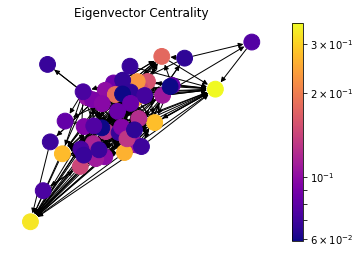

In [ ]:
import networkx as nx
import random

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(graph, pos, measures, measure_name):
  
  nodes = nx.draw_networkx_nodes(graph, pos, node_size=250, cmap=plt.cm.plasma, 
                                  node_color=list(measures.values()),
                                  nodelist=measures.keys())
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
  # labels = nx.draw_networkx_labels(G, pos)
  edges = nx.draw_networkx_edges(graph, pos)

  plt.title(measure_name)
  plt.colorbar(nodes)
  plt.axis('off')
  plt.show()


def findTheNames (val, degrees):
  names = []
  for i in degrees:
      if i[1] == val:
        names.append(i[0])
  return names



def newFriendsWithWierdKids (graph, wk):
  for k in wk:
    for l in graph:
      rand = random.randint(1,101)
      if rand <= 40:
        graph.add_edge(l,k)
  
  G2 = nx.DiGraph(graph)
  ans = nx.katz_centrality(G2)
  pos = nx.spring_layout(graph, seed=675)

  l = list(ans.values())

  print("The average Katz centrality of all the nodes is: ", avgCent(l))
  print("The sum of the Katz centrality of this graph is: ", sum(l))
  print("The highest Katz centrality from all the nodes is: ", highestCent(l))
  print("The lowest Katz centrality from all the nodes is: ", lowestCent(l))
  print("The top ten values are: ", topTen(l),"\n")
  print("The dict of all the Katz centralities is presented now: ", ans, "\n")
  draw(graph, pos,ans, 'Eigenvector Centrality')

G = nx.read_pajek('project.net')
degrees = G.degree(G)
highestVal = 0
name = findTheNames(highestVal, degrees)
print("The names of the students that have the least amount of friends are called ", ' '.join([str(elem) for elem in name]), " they have ", highestVal, " friends")
print("----------------------------------------------------------------------------------------------")
G = newFriendsWithWierdKids(G,name)



####Finding the page rank with popularization

The names of the students that have the least amount of friends are called  Meyer Reinh. Zimmermann Bernh. Schubert Hergert Neidhardt  they have  0  friends
----------------------------------------------------------------------------------------------
The average page rank of all the nodes is:  0.019230769230769225
The sum of the page rank of this graph is:  0.9999999999999998
The highest page rank from all the nodes is:  0.24332501477681218
The lowest page rank from all the nodes is:  0
The top ten values are:  [0.24332501477681218, 0.21097057165287533, 0.14753441374457543, 0.08021502672714748, 0.021322919051662264, 0.019840644727210303, 0.018117525072543886, 0.013781988310436288, 0.013324336491975664, 0.011735216030542884] 

The dict of all the page ranks is presented now:  {'Schlegel': 0.011493010941700549, 'Albert Hager': 0.006045089578489491, 'Böger': 0.004157988193143347, 'Meier': 0.007371884369365398, 'Meinhold': 0.011735216030542884, 'Herold': 0.0062910237496339415, 'Rettig': 0

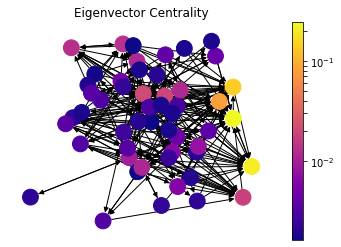

In [ ]:
import networkx as nx
import random

def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()



def findTheNames (val, degrees):
  names = []
  for i in degrees:
      if i[1] == val:
        names.append(i[0])
  return names



def newFriendsWithWierdKids (graph, wk):
  for k in wk:
    for l in graph:
      rand = random.randint(1,101)
      if rand <= 40:
        graph.add_edge(l,k)
  
  G2 = nx.DiGraph(graph)
  ans = nx.pagerank(G2)
  pos = nx.spring_layout(graph, seed=675)

  l = list(ans.values())

  print("The average page rank of all the nodes is: ", avgCent(l))
  print("The sum of the page rank of this graph is: ", sum(l))
  print("The highest page rank from all the nodes is: ", highestCent(l))
  print("The lowest page rank from all the nodes is: ", lowestCent(l))
  print("The top ten values are: ", topTen(l),"\n")
  print("The dict of all the page ranks is presented now: ", ans, "\n")
  draw(G, pos,ans, 'Eigenvector Centrality')

G = nx.read_pajek('project.net')
degrees = G.degree(G)
highestVal = 0
name = findTheNames(highestVal, degrees)
print("The names of the students that have the least amount of friends are called ", ' '.join([str(elem) for elem in name]), " they have ", highestVal, " friends")
print("----------------------------------------------------------------------------------------------")
G = newFriendsWithWierdKids(G,name)



####Finding the betweeness centrlity with popularization

The names of the students that have the least amount of friends are called  Meyer Reinh. Zimmermann Bernh. Schubert Hergert Neidhardt  they have  0  friends
----------------------------------------------------------------------------------------------
The average page rank of all the nodes is:  0.03398190045248869
The sum of the page rank of this graph is:  1.7670588235294118
The highest page rank from all the nodes is:  0.21472613878496236
The lowest page rank from all the nodes is:  0
The top ten values are:  [0.21472613878496236, 0.18791970121381882, 0.12133208839091195, 0.11481808278867102, 0.09019372022313199, 0.08699849932202872, 0.08444506691565513, 0.08200419515125397, 0.07060999784529198, 0.06674829527770704] 

The dict of all the page ranks is presented now:  {'Schlegel': 0.08699849932202872, 'Albert Hager': 0.005623093681917211, 'Böger': 0.03811939585468996, 'Meier': 0.12133208839091195, 'Meinhold': 0.04867592538180772, 'Herold': 0.03789490139490139, 'Rettig': 0.050672636731

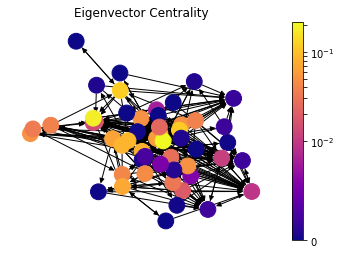

In [ ]:
import networkx as nx
import random


def avgCent(vals):
  average = 0
  for i in vals:
    average = average + i

  average = average / len(G)
  return average

def highestCent(vals):
  hc = 0
  for i in vals:
    if hc < i:
      hc = i
  return hc

def lowestCent(vals):
  lc = 0
  for i in vals:
    if lc > i:
      lc = i
  return lc

def topTen(vals):
  tT = []
  for i in sorted(vals, reverse=True) :
    if len(tT) == 10:
      return tT
    tT.append(i)
  
  return tT

def draw(graph, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(graph, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(graph, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()


def findTheNames (val, degrees):
  names = []
  for i in degrees:
      if i[1] == val:
        names.append(i[0])
  return names



def newFriendsWithWierdKids (graph, wk):
  for k in wk:
    for l in graph:
      rand = random.randint(1,101)
      if rand <= 40:
        graph.add_edge(l,k)
  
  G2 = nx.DiGraph(graph)
  ans = nx.betweenness_centrality(G2)
  pos = nx.spring_layout(graph, seed=675)

  l = list(ans.values())

  print("The average page rank of all the nodes is: ", avgCent(l))
  print("The sum of the page rank of this graph is: ", sum(l))
  print("The highest page rank from all the nodes is: ", highestCent(l))
  print("The lowest page rank from all the nodes is: ", lowestCent(l))
  print("The top ten values are: ", topTen(l),"\n")
  print("The dict of all the page ranks is presented now: ", ans, "\n")
  draw(graph, pos,ans, 'Eigenvector Centrality')

G = nx.read_pajek('project.net')
degrees = G.degree(G)
highestVal = 0
name = findTheNames(highestVal, degrees)
print("The names of the students that have the least amount of friends are called ", ' '.join([str(elem) for elem in name]), " they have ", highestVal, " friends")
print("----------------------------------------------------------------------------------------------")
G = newFriendsWithWierdKids(G,name)

